## Logic Based FizzBuzz Function [Software 1.0]

In [13]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    # If n / a ; where a is any number greater than 1 has the remainder as 0 which means it is divisible by n. Therefore,
    # in the first condition we check if it is divisible by both 3 and 5, If it isn't then we check if it is divisible
    # by only 3 and if not then try 5. If it is not divisible by either 3 or 5 then we return "Other". All the other return
    # statements work on the FizzBuzz Game.
    
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [14]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    # Amongst other data types in Python, List is an example of mutable object. We need a mutable object to
    # modify the data such as to Normalize the data set, also Machine Learning is based on repetative examples
    # if we use a tuple then it wouldn't be possible. Since Data frames use dictionary of lists to write data to csv
    # this is another case where we need them.
    
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    # We need training data to teach the model about what answer is expected from it. Example to make it learn what is 
    # a cat we have to show it pictures of cat
    
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    # Data frames enable us to view multi-column data in two dimensions which is usefull here because one part is the
    # input while the other is the output
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [15]:
def processData(dataset):
    
    # Why do we have to process?
    # If we just input the numbers as they are then we won't be able to show patterns in the data. Each input will be 
    # connected to n hidden layers, which is useless. Another case is of dimensionality, a 4 labelled output data cannot
    # be expressed in 1dimensions(viz. Using only 1 input). We need atleast 4 or more than that so that the vectors
    # span all the dimensions
    
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [16]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        # Because we are planning to have 10 input Layer neurons/nodes also the max number which we have to train for is
        # 1000 which takes up 10 bits after converting it to binary.
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [17]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

def get_model_sequential_SGD():
    # Gives better results on the test data set than using the default model
    input_size = 10
    drop_out = 0.2
    first_dense_layer_nodes  = 256
    second_dense_layer_nodes = 128
    final_dense_layer_nodes = 4
    
    # Why do we need a model?
    # Model is like a black box, we need it basically to teach it how to translate the inputs to required output
    
    # Why use Dense layer and then activation?
    # Dense layer is like a structure. Formally a dense layer implemnts kernel i.e The weight matrix which is used
    # while running it iterations.
    # Activation is a function of input vectors and the kernel. Therefore, we first need kernel ie. The weight matrix
    # or the dense layer before activation
    # https://keras.io/layers/core/
    
    # Why use sequential model with layers?
    # Sequential model allows us to design the network layer by layer. It is enough for simple cases like we have now
    # https://jovianlin.io/keras-models-sequential-vs-functional/
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    model.add(Dense(second_dense_layer_nodes,input_dim=input_size))
    model.add(Activation('relu'))
    # Why dropout?
    # Avoids the model being overfitted for the training data such that it fails to generalize for new incidences.
    model.add(Dropout(drop_out))
    
    model.add(Dense(final_dense_layer_nodes))
    
    model.add(Activation('softmax'))
    # Why Softmax?
    # Since this is a classification problem, for the last output layer we need to translate the continous signal 
    # into a discrete signal which will give us the classes. The softmax activation converts a vector of arbitary
    # real values into a vector of values in a specific range from which we can get categories.
    
    model.summary()
    
    # Why use categorical_crossentropy?
    # Here if we have to use crossentropy loss functions we have various choices such as Binary Crossentropy, categorical
    # crossentropy and Sparse Crossentropy. Here we have One-hot Encoded the input therefore we have to use categorical
    # crossentropy.
    # https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/
    
    sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['categorical_accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [74]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [75]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               2816      
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 516       
_________________________________________________________________
activation_16 (Activation)   (None, 4)                 0         
Total para

# <font color = blue>Run Model</font>

In [76]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 1000

tensorboard_cb   = TensorBoard(log_dir='./logs/kerasLogs/', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')
import keras
reduce_LR = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=early_patience, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)



# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb,reduce_LR]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 1s 817us/step - loss: 1.3481 - categorical_accuracy: 0.4167 - val_loss: 1.2609 - val_categorical_accuracy: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 43us/step - loss: 1.2336 - categorical_accuracy: 0.5333 - val_loss: 1.1709 - val_categorical_accuracy: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 61us/step - loss: 1.1755 - categorical_accuracy: 0.5333 - val_loss: 1.1568 - val_categorical_accuracy: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 67us/step - loss: 1.1548 - categorical_accuracy: 0.5333 - val_loss: 1.1552 - val_categorical_accuracy: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 58us/step - loss: 1.1509 - categorical_accuracy: 0.5333 - val_loss: 1.1489 - val_categorical_accuracy: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 66us/step - loss: 1.1467 - categorical_accu

Epoch 49/10000
720/720 [==============================] - 0s 62us/step - loss: 1.1269 - categorical_accuracy: 0.5333 - val_loss: 1.1436 - val_categorical_accuracy: 0.5333
Epoch 50/10000
720/720 [==============================] - 0s 57us/step - loss: 1.1190 - categorical_accuracy: 0.5333 - val_loss: 1.1436 - val_categorical_accuracy: 0.5333
Epoch 51/10000
720/720 [==============================] - 0s 65us/step - loss: 1.1257 - categorical_accuracy: 0.5333 - val_loss: 1.1435 - val_categorical_accuracy: 0.5333
Epoch 52/10000
720/720 [==============================] - 0s 68us/step - loss: 1.1226 - categorical_accuracy: 0.5333 - val_loss: 1.1438 - val_categorical_accuracy: 0.5333
Epoch 53/10000
720/720 [==============================] - 0s 57us/step - loss: 1.1262 - categorical_accuracy: 0.5333 - val_loss: 1.1431 - val_categorical_accuracy: 0.5333
Epoch 54/10000
720/720 [==============================] - 0s 56us/step - loss: 1.1272 - categorical_accuracy: 0.5333 - val_loss: 1.1429 - val_cat

Epoch 97/10000
720/720 [==============================] - 0s 66us/step - loss: 1.0996 - categorical_accuracy: 0.5361 - val_loss: 1.1488 - val_categorical_accuracy: 0.5333
Epoch 98/10000
720/720 [==============================] - 0s 50us/step - loss: 1.1007 - categorical_accuracy: 0.5333 - val_loss: 1.1485 - val_categorical_accuracy: 0.5333
Epoch 99/10000
720/720 [==============================] - 0s 49us/step - loss: 1.0961 - categorical_accuracy: 0.5333 - val_loss: 1.1488 - val_categorical_accuracy: 0.5333
Epoch 100/10000
720/720 [==============================] - 0s 59us/step - loss: 1.1021 - categorical_accuracy: 0.5333 - val_loss: 1.1489 - val_categorical_accuracy: 0.5333
Epoch 101/10000
720/720 [==============================] - 0s 102us/step - loss: 1.0970 - categorical_accuracy: 0.5333 - val_loss: 1.1487 - val_categorical_accuracy: 0.5333
Epoch 102/10000
720/720 [==============================] - 0s 47us/step - loss: 1.1035 - categorical_accuracy: 0.5333 - val_loss: 1.1491 - val

Epoch 192/10000
720/720 [==============================] - 0s 59us/step - loss: 0.9497 - categorical_accuracy: 0.5931 - val_loss: 1.1004 - val_categorical_accuracy: 0.5389
Epoch 193/10000
720/720 [==============================] - 0s 52us/step - loss: 0.9314 - categorical_accuracy: 0.6097 - val_loss: 1.0988 - val_categorical_accuracy: 0.5500
Epoch 194/10000
720/720 [==============================] - 0s 48us/step - loss: 0.9297 - categorical_accuracy: 0.6278 - val_loss: 1.0931 - val_categorical_accuracy: 0.5444
Epoch 195/10000
720/720 [==============================] - 0s 55us/step - loss: 0.9322 - categorical_accuracy: 0.6278 - val_loss: 1.0899 - val_categorical_accuracy: 0.5500
Epoch 196/10000
720/720 [==============================] - 0s 43us/step - loss: 0.9334 - categorical_accuracy: 0.6139 - val_loss: 1.0866 - val_categorical_accuracy: 0.5500
Epoch 197/10000
720/720 [==============================] - 0s 55us/step - loss: 0.9291 - categorical_accuracy: 0.6292 - val_loss: 1.0865 - v

Epoch 287/10000
720/720 [==============================] - 0s 48us/step - loss: 0.4101 - categorical_accuracy: 0.8694 - val_loss: 0.6658 - val_categorical_accuracy: 0.7722
Epoch 288/10000
720/720 [==============================] - 0s 53us/step - loss: 0.4070 - categorical_accuracy: 0.8597 - val_loss: 0.6703 - val_categorical_accuracy: 0.7778
Epoch 289/10000
720/720 [==============================] - 0s 43us/step - loss: 0.4090 - categorical_accuracy: 0.8625 - val_loss: 0.6535 - val_categorical_accuracy: 0.7833
Epoch 290/10000
720/720 [==============================] - 0s 41us/step - loss: 0.4049 - categorical_accuracy: 0.8806 - val_loss: 0.6463 - val_categorical_accuracy: 0.7889
Epoch 291/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3907 - categorical_accuracy: 0.8889 - val_loss: 0.6462 - val_categorical_accuracy: 0.7944
Epoch 292/10000
720/720 [==============================] - 0s 40us/step - loss: 0.3965 - categorical_accuracy: 0.8806 - val_loss: 0.6476 - v

Epoch 382/10000
720/720 [==============================] - 0s 42us/step - loss: 0.1306 - categorical_accuracy: 0.9750 - val_loss: 0.3801 - val_categorical_accuracy: 0.8778
Epoch 383/10000
720/720 [==============================] - 0s 68us/step - loss: 0.1193 - categorical_accuracy: 0.9847 - val_loss: 0.3740 - val_categorical_accuracy: 0.9056
Epoch 384/10000
720/720 [==============================] - 0s 55us/step - loss: 0.1159 - categorical_accuracy: 0.9889 - val_loss: 0.3786 - val_categorical_accuracy: 0.8889
Epoch 385/10000
720/720 [==============================] - 0s 46us/step - loss: 0.1156 - categorical_accuracy: 0.9903 - val_loss: 0.3696 - val_categorical_accuracy: 0.8889
Epoch 386/10000
720/720 [==============================] - 0s 43us/step - loss: 0.1192 - categorical_accuracy: 0.9806 - val_loss: 0.3608 - val_categorical_accuracy: 0.8889
Epoch 387/10000
720/720 [==============================] - 0s 43us/step - loss: 0.1139 - categorical_accuracy: 0.9875 - val_loss: 0.3833 - v

Epoch 477/10000
720/720 [==============================] - 0s 41us/step - loss: 0.0446 - categorical_accuracy: 1.0000 - val_loss: 0.2821 - val_categorical_accuracy: 0.9056
Epoch 478/10000
720/720 [==============================] - 0s 45us/step - loss: 0.0463 - categorical_accuracy: 0.9972 - val_loss: 0.2818 - val_categorical_accuracy: 0.9056
Epoch 479/10000
720/720 [==============================] - 0s 46us/step - loss: 0.0484 - categorical_accuracy: 0.9972 - val_loss: 0.2779 - val_categorical_accuracy: 0.9056
Epoch 480/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0431 - categorical_accuracy: 0.9986 - val_loss: 0.2882 - val_categorical_accuracy: 0.9056
Epoch 481/10000
720/720 [==============================] - 0s 34us/step - loss: 0.0443 - categorical_accuracy: 0.9986 - val_loss: 0.2792 - val_categorical_accuracy: 0.8944
Epoch 482/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0450 - categorical_accuracy: 0.9972 - val_loss: 0.2813 - v

Epoch 572/10000
720/720 [==============================] - 0s 55us/step - loss: 0.0251 - categorical_accuracy: 0.9986 - val_loss: 0.2555 - val_categorical_accuracy: 0.9167
Epoch 573/10000
720/720 [==============================] - 0s 70us/step - loss: 0.0248 - categorical_accuracy: 0.9986 - val_loss: 0.2553 - val_categorical_accuracy: 0.9056
Epoch 574/10000
720/720 [==============================] - 0s 43us/step - loss: 0.0234 - categorical_accuracy: 1.0000 - val_loss: 0.2515 - val_categorical_accuracy: 0.9167
Epoch 575/10000
720/720 [==============================] - 0s 48us/step - loss: 0.0242 - categorical_accuracy: 1.0000 - val_loss: 0.2513 - val_categorical_accuracy: 0.9167
Epoch 576/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0235 - categorical_accuracy: 1.0000 - val_loss: 0.2589 - val_categorical_accuracy: 0.9111
Epoch 577/10000
720/720 [==============================] - 0s 51us/step - loss: 0.0248 - categorical_accuracy: 1.0000 - val_loss: 0.2538 - v

Epoch 667/10000
720/720 [==============================] - 0s 58us/step - loss: 0.0155 - categorical_accuracy: 1.0000 - val_loss: 0.2453 - val_categorical_accuracy: 0.9222
Epoch 668/10000
720/720 [==============================] - 0s 61us/step - loss: 0.0145 - categorical_accuracy: 1.0000 - val_loss: 0.2397 - val_categorical_accuracy: 0.9167
Epoch 669/10000
720/720 [==============================] - 0s 64us/step - loss: 0.0162 - categorical_accuracy: 0.9986 - val_loss: 0.2433 - val_categorical_accuracy: 0.9222
Epoch 670/10000
720/720 [==============================] - 0s 64us/step - loss: 0.0152 - categorical_accuracy: 1.0000 - val_loss: 0.2371 - val_categorical_accuracy: 0.9222
Epoch 671/10000
720/720 [==============================] - 0s 57us/step - loss: 0.0182 - categorical_accuracy: 0.9986 - val_loss: 0.2378 - val_categorical_accuracy: 0.9167
Epoch 672/10000
720/720 [==============================] - 0s 77us/step - loss: 0.0153 - categorical_accuracy: 1.0000 - val_loss: 0.2299 - v

Epoch 762/10000
720/720 [==============================] - 0s 84us/step - loss: 0.0093 - categorical_accuracy: 1.0000 - val_loss: 0.2356 - val_categorical_accuracy: 0.9222
Epoch 763/10000
720/720 [==============================] - 0s 62us/step - loss: 0.0110 - categorical_accuracy: 1.0000 - val_loss: 0.2342 - val_categorical_accuracy: 0.9278
Epoch 764/10000
720/720 [==============================] - 0s 111us/step - loss: 0.0103 - categorical_accuracy: 1.0000 - val_loss: 0.2378 - val_categorical_accuracy: 0.9278
Epoch 765/10000
720/720 [==============================] - 0s 81us/step - loss: 0.0108 - categorical_accuracy: 1.0000 - val_loss: 0.2341 - val_categorical_accuracy: 0.9278
Epoch 766/10000
720/720 [==============================] - 0s 62us/step - loss: 0.0107 - categorical_accuracy: 1.0000 - val_loss: 0.2366 - val_categorical_accuracy: 0.9278
Epoch 767/10000
720/720 [==============================] - 0s 65us/step - loss: 0.0106 - categorical_accuracy: 1.0000 - val_loss: 0.2396 - 

Epoch 857/10000
720/720 [==============================] - 0s 37us/step - loss: 0.0074 - categorical_accuracy: 1.0000 - val_loss: 0.2325 - val_categorical_accuracy: 0.9222
Epoch 858/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0074 - categorical_accuracy: 1.0000 - val_loss: 0.2356 - val_categorical_accuracy: 0.9167
Epoch 859/10000
720/720 [==============================] - 0s 38us/step - loss: 0.0065 - categorical_accuracy: 1.0000 - val_loss: 0.2407 - val_categorical_accuracy: 0.9222
Epoch 860/10000
720/720 [==============================] - 0s 41us/step - loss: 0.0072 - categorical_accuracy: 1.0000 - val_loss: 0.2323 - val_categorical_accuracy: 0.9222
Epoch 861/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0095 - categorical_accuracy: 1.0000 - val_loss: 0.2342 - val_categorical_accuracy: 0.9222
Epoch 862/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0083 - categorical_accuracy: 1.0000 - val_loss: 0.2362 - v

Epoch 952/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0067 - categorical_accuracy: 1.0000 - val_loss: 0.2366 - val_categorical_accuracy: 0.9222
Epoch 953/10000
720/720 [==============================] - 0s 52us/step - loss: 0.0053 - categorical_accuracy: 1.0000 - val_loss: 0.2346 - val_categorical_accuracy: 0.9278
Epoch 954/10000
720/720 [==============================] - 0s 46us/step - loss: 0.0054 - categorical_accuracy: 1.0000 - val_loss: 0.2335 - val_categorical_accuracy: 0.9278
Epoch 955/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0063 - categorical_accuracy: 1.0000 - val_loss: 0.2332 - val_categorical_accuracy: 0.9333
Epoch 956/10000
720/720 [==============================] - 0s 34us/step - loss: 0.0070 - categorical_accuracy: 1.0000 - val_loss: 0.2334 - val_categorical_accuracy: 0.9333
Epoch 957/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0061 - categorical_accuracy: 1.0000 - val_loss: 0.2315 - v

720/720 [==============================] - 0s 33us/step - loss: 0.0048 - categorical_accuracy: 1.0000 - val_loss: 0.2353 - val_categorical_accuracy: 0.9278
Epoch 1047/10000
720/720 [==============================] - 0s 38us/step - loss: 0.0051 - categorical_accuracy: 1.0000 - val_loss: 0.2325 - val_categorical_accuracy: 0.9278
Epoch 1048/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0059 - categorical_accuracy: 0.9986 - val_loss: 0.2276 - val_categorical_accuracy: 0.9333
Epoch 1049/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0057 - categorical_accuracy: 1.0000 - val_loss: 0.2319 - val_categorical_accuracy: 0.9278
Epoch 1050/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0054 - categorical_accuracy: 1.0000 - val_loss: 0.2296 - val_categorical_accuracy: 0.9278
Epoch 1051/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0079 - categorical_accuracy: 1.0000 - val_loss: 0.2305 - val_categori

720/720 [==============================] - 0s 39us/step - loss: 0.0053 - categorical_accuracy: 1.0000 - val_loss: 0.2287 - val_categorical_accuracy: 0.9222
Epoch 1141/10000
720/720 [==============================] - 0s 83us/step - loss: 0.0050 - categorical_accuracy: 1.0000 - val_loss: 0.2305 - val_categorical_accuracy: 0.9333
Epoch 1142/10000
720/720 [==============================] - 0s 79us/step - loss: 0.0041 - categorical_accuracy: 1.0000 - val_loss: 0.2289 - val_categorical_accuracy: 0.9333
Epoch 1143/10000
720/720 [==============================] - 0s 60us/step - loss: 0.0044 - categorical_accuracy: 1.0000 - val_loss: 0.2264 - val_categorical_accuracy: 0.9278
Epoch 1144/10000
720/720 [==============================] - 0s 81us/step - loss: 0.0048 - categorical_accuracy: 1.0000 - val_loss: 0.2287 - val_categorical_accuracy: 0.9333
Epoch 1145/10000
720/720 [==============================] - 0s 75us/step - loss: 0.0042 - categorical_accuracy: 1.0000 - val_loss: 0.2347 - val_categori

720/720 [==============================] - 0s 79us/step - loss: 0.0038 - categorical_accuracy: 1.0000 - val_loss: 0.2328 - val_categorical_accuracy: 0.9278
Epoch 1235/10000
720/720 [==============================] - 0s 62us/step - loss: 0.0035 - categorical_accuracy: 1.0000 - val_loss: 0.2314 - val_categorical_accuracy: 0.9278
Epoch 1236/10000
720/720 [==============================] - 0s 60us/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.2300 - val_categorical_accuracy: 0.9333
Epoch 1237/10000
720/720 [==============================] - 0s 72us/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.2308 - val_categorical_accuracy: 0.9278
Epoch 1238/10000
720/720 [==============================] - 0s 74us/step - loss: 0.0039 - categorical_accuracy: 1.0000 - val_loss: 0.2295 - val_categorical_accuracy: 0.9222
Epoch 1239/10000
720/720 [==============================] - 0s 49us/step - loss: 0.0041 - categorical_accuracy: 1.0000 - val_loss: 0.2240 - val_categori

720/720 [==============================] - 0s 43us/step - loss: 0.0042 - categorical_accuracy: 1.0000 - val_loss: 0.2311 - val_categorical_accuracy: 0.9389
Epoch 1329/10000
720/720 [==============================] - 0s 48us/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.2340 - val_categorical_accuracy: 0.9278
Epoch 1330/10000
720/720 [==============================] - 0s 44us/step - loss: 0.0041 - categorical_accuracy: 1.0000 - val_loss: 0.2264 - val_categorical_accuracy: 0.9333
Epoch 1331/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.2299 - val_categorical_accuracy: 0.9333
Epoch 1332/10000
720/720 [==============================] - 0s 41us/step - loss: 0.0033 - categorical_accuracy: 1.0000 - val_loss: 0.2328 - val_categorical_accuracy: 0.9333
Epoch 1333/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.2324 - val_categori

720/720 [==============================] - 0s 47us/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.2391 - val_categorical_accuracy: 0.9278
Epoch 1423/10000
720/720 [==============================] - 0s 44us/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.2478 - val_categorical_accuracy: 0.9333
Epoch 1424/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0035 - categorical_accuracy: 1.0000 - val_loss: 0.2412 - val_categorical_accuracy: 0.9278
Epoch 1425/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0023 - categorical_accuracy: 1.0000 - val_loss: 0.2410 - val_categorical_accuracy: 0.9278
Epoch 1426/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.2386 - val_categorical_accuracy: 0.9333
Epoch 1427/10000
720/720 [==============================] - 0s 58us/step - loss: 0.0072 - categorical_accuracy: 0.9986 - val_loss: 0.2384 - val_categori

720/720 [==============================] - 0s 44us/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.2422 - val_categorical_accuracy: 0.9389
Epoch 1517/10000
720/720 [==============================] - 0s 48us/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.2310 - val_categorical_accuracy: 0.9333
Epoch 1518/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 0.2308 - val_categorical_accuracy: 0.9389
Epoch 1519/10000
720/720 [==============================] - 0s 45us/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.2319 - val_categorical_accuracy: 0.9333
Epoch 1520/10000
720/720 [==============================] - 0s 47us/step - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 0.2334 - val_categorical_accuracy: 0.9333
Epoch 1521/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.2396 - val_categori

720/720 [==============================] - 0s 50us/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.2300 - val_categorical_accuracy: 0.9333
Epoch 1611/10000
720/720 [==============================] - 0s 46us/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 0.2289 - val_categorical_accuracy: 0.9333
Epoch 1612/10000
720/720 [==============================] - 0s 48us/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.2349 - val_categorical_accuracy: 0.9222
Epoch 1613/10000
720/720 [==============================] - 0s 46us/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.2344 - val_categorical_accuracy: 0.9333
Epoch 1614/10000
720/720 [==============================] - 0s 48us/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.2342 - val_categorical_accuracy: 0.9333
Epoch 1615/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0023 - categorical_accuracy: 1.0000 - val_loss: 0.2394 - val_categori

720/720 [==============================] - 0s 50us/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.2323 - val_categorical_accuracy: 0.9389
Epoch 1705/10000
720/720 [==============================] - 0s 46us/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.2322 - val_categorical_accuracy: 0.9444
Epoch 1706/10000
720/720 [==============================] - 0s 50us/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.2335 - val_categorical_accuracy: 0.9444
Epoch 1707/10000
720/720 [==============================] - 0s 50us/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.2317 - val_categorical_accuracy: 0.9389
Epoch 1708/10000
720/720 [==============================] - 0s 45us/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.2362 - val_categorical_accuracy: 0.9389
Epoch 1709/10000
720/720 [==============================] - 0s 49us/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.2337 - val_categori

720/720 [==============================] - 0s 41us/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.2450 - val_categorical_accuracy: 0.9389
Epoch 1799/10000
720/720 [==============================] - 0s 44us/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.2405 - val_categorical_accuracy: 0.9333
Epoch 1800/10000
720/720 [==============================] - 0s 43us/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.2351 - val_categorical_accuracy: 0.9278
Epoch 1801/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0023 - categorical_accuracy: 1.0000 - val_loss: 0.2361 - val_categorical_accuracy: 0.9333
Epoch 1802/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.2354 - val_categorical_accuracy: 0.9333
Epoch 1803/10000
720/720 [==============================] - 0s 45us/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.2371 - val_categori

720/720 [==============================] - 0s 36us/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.2333 - val_categorical_accuracy: 0.9389
Epoch 1893/10000
720/720 [==============================] - 0s 51us/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.2345 - val_categorical_accuracy: 0.9389
Epoch 1894/10000
720/720 [==============================] - 0s 37us/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 0.2372 - val_categorical_accuracy: 0.9389
Epoch 1895/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.2370 - val_categorical_accuracy: 0.9389
Epoch 1896/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.2316 - val_categorical_accuracy: 0.9389
Epoch 1897/10000
720/720 [==============================] - 0s 37us/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.2329 - val_categori

720/720 [==============================] - 0s 39us/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.2358 - val_categorical_accuracy: 0.9389
Epoch 1987/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.2379 - val_categorical_accuracy: 0.9333
Epoch 1988/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0023 - categorical_accuracy: 1.0000 - val_loss: 0.2297 - val_categorical_accuracy: 0.9389
Epoch 1989/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.2281 - val_categorical_accuracy: 0.9389
Epoch 1990/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.2372 - val_categorical_accuracy: 0.9444
Epoch 1991/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.2255 - val_categori

720/720 [==============================] - 0s 49us/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.2346 - val_categorical_accuracy: 0.9389
Epoch 2081/10000
720/720 [==============================] - 0s 50us/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.2413 - val_categorical_accuracy: 0.9444
Epoch 2082/10000
720/720 [==============================] - 0s 59us/step - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 0.2340 - val_categorical_accuracy: 0.9444
Epoch 2083/10000
720/720 [==============================] - 0s 86us/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.2279 - val_categorical_accuracy: 0.9333
Epoch 2084/10000
720/720 [==============================] - 0s 56us/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.2266 - val_categorical_accuracy: 0.9389
Epoch 2085/10000
720/720 [==============================] - 0s 41us/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.2309 - val_categori

720/720 [==============================] - 0s 41us/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.2402 - val_categorical_accuracy: 0.9389
Epoch 2175/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.2382 - val_categorical_accuracy: 0.9389
Epoch 2176/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.2376 - val_categorical_accuracy: 0.9389
Epoch 2177/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.2349 - val_categorical_accuracy: 0.9333
Epoch 2178/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.2339 - val_categorical_accuracy: 0.9333
Epoch 2179/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.2352 - val_categori

# <font color = blue>Training and Validation Graphs</font>

In [105]:
print("Average Categorical Accuracy Before Early Stopping: "+ str( np.mean(history.history['categorical_accuracy'][-early_patience:])))
print("Average Validation Loss Before Early Stopping: "+ str(np.mean(history.history['val_categorical_accuracy'][-early_patience:])))

Categorical Accuracy Before Early Stopping: 0.9999902777791023
Validation Loss Before Early Stopping: 0.9345444416417015


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f052533c438>,
      dtype=object)

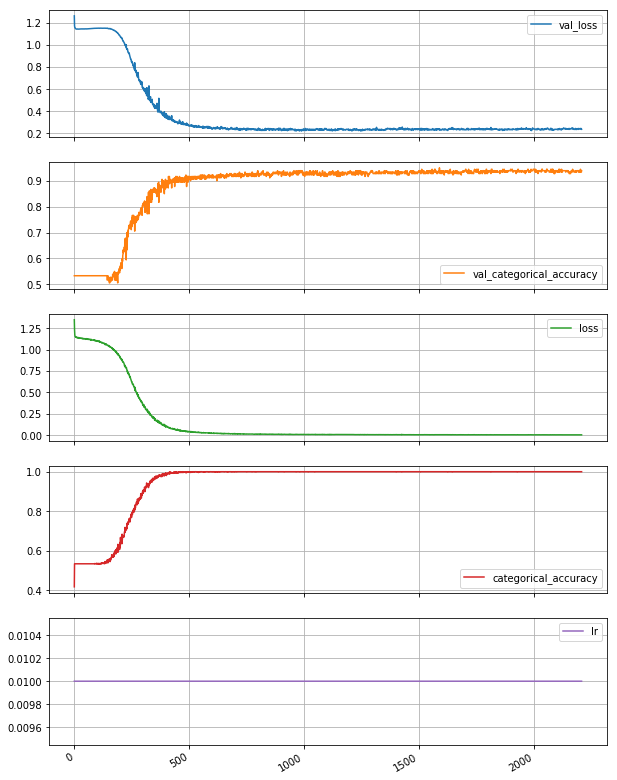

In [77]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [94]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

               pred:Fizz  pred:Buzz  pred:FizzBuzz  pred:Other
true:Fizz             27          0              0           0
true:Buzz              1         10              0           3
true:FizzBuzz          0          0              6           0
true:Other             1          0              0          52
[[27  0  0  0]
 [ 1 10  0  3]
 [ 0  0  6  0]
 [ 1  0  0 52]]


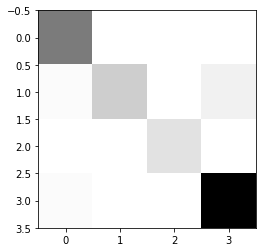

In [213]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

processedTestData  = encodeData(testData['input'].values)

processedTestLabel = encodeLabel(testData['label'].values)

predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
conf = confusion_matrix(testData['label'].values, predictedTestLabel,labels=("Fizz","Buzz","FizzBuzz","Other"))
print(pd.DataFrame(conf, index=['true:Fizz', 'true:Buzz','true:FizzBuzz','true:Other'], columns=['pred:Fizz', 'pred:Buzz','pred:FizzBuzz','pred:Other']))

plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

#pd.crosstab(testData['label'].values, predictedTestLabel, rownames, colnames)

In [214]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1
        

        
print("Errors: " + str(wrong), " Correct :" + str(right))


print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "XXXXXXXX")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "XXXXXXXX")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 5  Correct :95
Testing Accuracy: 95.0
